In [1]:
#project 

In [1]:

from keras.utils import to_categorical
from tqdm.notebook import tqdm
from keras_preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from keras.models import model_from_json
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'


In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [4]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [5]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [6]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [7]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale')
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [8]:
train_features = extract_features(train['image']) 

  0%|          | 0/28821 [00:00<?, ?it/s]

In [9]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [10]:
x_train = train_features/255.0
x_test = test_features/255.0

In [11]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [12]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [13]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [14]:
from keras.layers import Input

model = Sequential()
# Add an explicit Input layer
model.add(Input(shape=(48,48,1)))

# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(7, activation='softmax'))


In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [16]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 68s 294ms/step - accuracy: 0.2338 - loss: 1.8365 - val_accuracy: 0.2588 - val_loss: 1.7965
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 65s 289ms/step - accuracy: 0.2491 - loss: 1.8105 - val_accuracy: 0.2785 - val_loss: 1.7561
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 65s 289ms/step - accuracy: 0.2877 - loss: 1.7303 - val_accuracy: 0.3905 - val_loss: 1.5666
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 65s 288ms/step - accuracy: 0.3623 - loss: 1.5930 - val_accuracy: 0.4533 - val_loss: 1.4189
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 65s 287ms/step - accuracy: 0.4172 - loss: 1.4938 - val_accuracy: 0.4837 - val_loss: 1.3548
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 65s 286ms/step - accuracy: 0.4467 - loss: 1.4338 - val_accuracy: 0.5003 - val_loss: 1.2998
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 65s 287ms/step - accuracy: 0.4709 - loss: 1.3873 - val_accuracy: 0.5219 - val_loss: 1.2486
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 65s 285ms/step - accuracy: 0.4840 -

In [17]:
# Save the model in Keras format (.keras extension)
model.save("emotiondetector.keras")  # Recommended Keras format

# Optionally, you can still save the model's architecture to a JSON file, if needed
model_json = model.to_json()
with open("emotiondetector.json", 'w') as json_file:
    json_file.write(model_json)


In [18]:
from keras.models import load_model

# Load the model directly from the .keras file
model = load_model("emotiondetector.keras")

# Recompile the model with the desired optimizer
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [19]:
labels = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [20]:

def ef(image_path):
    # Load image with color_mode='grayscale'
    img = load_img(image_path, color_mode='grayscale', target_size=(48, 48))
    img_array = img_to_array(img)
    # Normalize the image
    img_array = img_array / 255.0
    # Reshape for model input
    img_array = img_array.reshape(1, 48, 48, 1)
    return img_array


Original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Model prediction is  sad


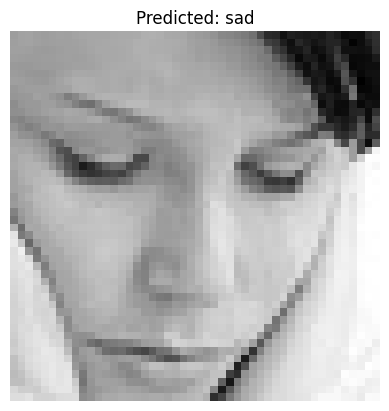

In [21]:

# Path to the image
image_path = 'images/train/sad/42.jpg'
print("Original image is of sad")

# Extract features
img = ef(image_path)

# Predict using the model
pred = model.predict(img)
pred_label = labels[pred.argmax()]  # Ensure 'labels' is defined

print("Model prediction is ", pred_label)

# Display the image
plt.imshow(img.reshape(48, 48), cmap='gray')
plt.title(f'Predicted: {pred_label}')
plt.axis('off')  # Hide axis
plt.show()
